<a href="https://colab.research.google.com/github/2303A52486/AIML_2303A52486/blob/main/SET_%E2%80%93_3_(KNN_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

V.Abhinav(2303A52486)

## 1. Apply KNN with k=3 and Evaluate Accuracy

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Extract features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=3: {accuracy}")

Accuracy with k=3: 1.0


## 2. Visualize the Decision Boundary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


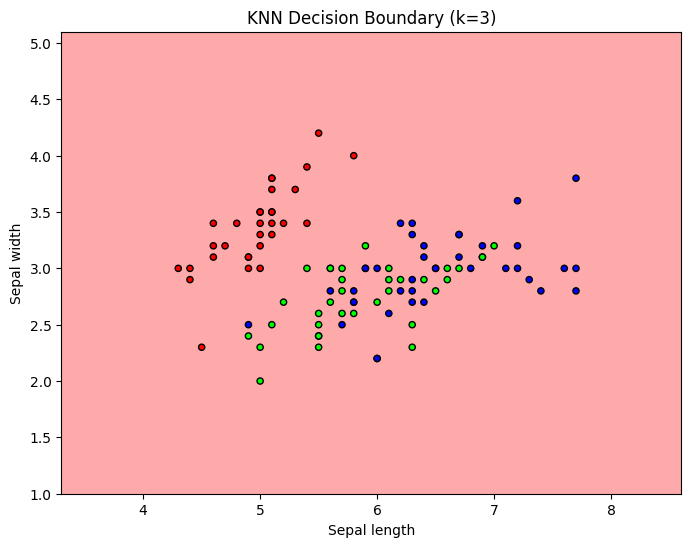

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create meshgrid
x_min, x_max = X_train['sepal_length'].min() - 1, X_train['sepal_length'].max() + 1
y_min, y_max = X_train['sepal_width'].min() - 1, X_train['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = pd.factorize(Z)[0].reshape(xx.shape) # Convert string labels to numerical categories

# Create colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train.astype('category').cat.codes, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("KNN Decision Boundary (k=3)")
plt.show()

## 3. Confusion Matrix

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## 4. Feature Scaling

Accuracy without scaling: 1.0


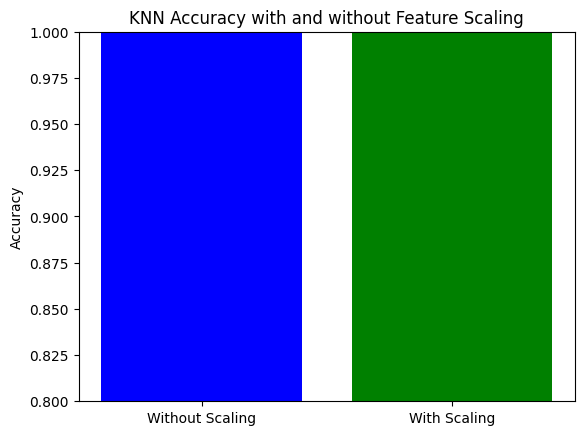

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Without Feature Scaling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_without_scaling = accuracy_score(y_test, y_pred)
print(f"Accuracy without scaling: {accuracy_without_scaling}")

# With Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)

# Create a bar graph
labels = ['Without Scaling', 'With Scaling']
accuracies = [accuracy_without_scaling, accuracy_with_scaling]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('KNN Accuracy with and without Feature Scaling')
plt.ylim([0.8, 1.0])  # Set y-axis limits for better visualization
plt.show()

print(f"Accuracy without scaling: {accuracy_without_scaling}")
print(f"Accuracy with scaling: {accuracy_with_scaling}")

## 5. K Tunning

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Test with k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy with k=5: {accuracy_k5}")

# Compare with k=3 (from previous code)
print(f"Accuracy with k=3: {accuracy}") # Assuming 'accuracy' is from the k=3 case

Accuracy with k=5: 0.7777777777777778
Accuracy with k=3: 1.0
